# NBA Game Outcome Prediction

#### **1**. **Web Scraping** 

To receive most up-to-date information and detailed information on team statistics, player stats, etc. We will webscrape instead of using an exisiting dataset that has limited attributes and may not give us full control over features.

In [3]:
import requests                 # requests to get info from url
from bs4 import BeautifulSoup   # web-scraping using beautifulsoup  
import pandas as pd             # storing web-scraped data into data frames
import os                       # storing csv files in data folder

# url
url = "https://www.basketball-reference.com/leagues/NBA_2024.html"

# using requests to get html information from page
page = requests.get(url)

# html parsing
soup = BeautifulSoup(page.text, 'html')                                           

# table & each row
tab = soup.find('table', {'id': 'per_game-team'})
rows = tab.find_all('tr')

# getting data and storing in a list
data = []
for row in rows[1:]:     # skipping headers
    columns = [columns.text for columns in row.find_all('td')]
    data.append(columns)

# putting data into dataframe
df = pd.DataFrame(data)

# subsetting team name and ppg
ppg = df.iloc[:, [0, 23]]

# creating another df
df_ppg = pd.DataFrame(ppg)

# renaming columns
df_ppg.rename(columns = {0 : 'Team', 23: 'PPG'}, inplace = True)

# changing column ppg column to be numeric
df_ppg['PPG'] = pd.to_numeric(df_ppg['PPG'])

# cleaning up dataframe
df_ppg['Team'] = df_ppg['Team'].str.replace('*', '')

# storing data in a dataframe for later use
df_ppg.to_csv(os.path.join('../data', 'ppg.csv'), index = False)

# resulting dataframe
df_ppg

,Team,PPG
0,Indiana Pacers,123.3
1,Boston Celtics,120.6
2,Oklahoma City Thunder,120.1
3,Milwaukee Bucks,119.0
4,Atlanta Hawks,118.3
5,Los Angeles Lakers,118.0
6,Dallas Mavericks,117.9
7,Golden State Warriors,117.8
8,Sacramento Kings,116.6
9,Phoenix Suns,116.2


In [4]:
# url
url = "https://www.basketball-reference.com/leagues/NBA_2024_standings.html"

# using requests to get html information from page
page = requests.get(url)

# html parsing
soup = BeautifulSoup(page.text, 'html')                                           

# table & each row
tabs = soup.find_all('table')

# getting data and storing in a list
data = []
for table in tabs:
    rows = table.find_all('tr')
    for row in rows[1:]:     # skipping headers
        team_name = row.find('a').text if row.find_all('a') else None  # getting team name
        columns = [columns.text.strip() for columns in row.find_all('td')] 
        if team_name and columns:
            data.append([team_name] + columns)

# putting data into dataframe
df = pd.DataFrame(data)

# subsetting win loss
win_loss = df.iloc[:, [0, 1, 2]]

# 30 teams
thirty_teams_wl = win_loss.head(30)

# win loss new dataframe
df_win_loss = pd.DataFrame(thirty_teams_wl)

# renaming columns
df_win_loss.rename(columns = {0 : 'Team', 1 : 'Wins', 2 : 'Losses'}, inplace = True) 

# adding win_loss percentage column
df_win_loss['Wins'] = pd.to_numeric(df_win_loss['Wins'])
df_win_loss['Losses'] = pd.to_numeric(df_win_loss['Losses'])
df_win_loss['Win Loss %'] = (df_win_loss['Wins'] / 82) * 100

# storing data in a dataframe for later use
df_win_loss.to_csv(os.path.join('../data', 'win_loss.csv'), index = False)

# resulting df
df_win_loss

,Team,Wins,Losses,Win Loss %
0,Boston Celtics,64,18,78.048780
1,New York Knicks,50,32,60.975610
2,Milwaukee Bucks,49,33,59.756098
3,Cleveland Cavaliers,48,34,58.536585
4,Orlando Magic,47,35,57.317073
5,Indiana Pacers,47,35,57.317073
6,Philadelphia 76ers,47,35,57.317073
7,Miami Heat,46,36,56.097561
8,Chicago Bulls,39,43,47.560976
9,Atlanta Hawks,36,46,43.902439


In [5]:
# merging both dataframes together into one that we will use for our predictors
df_combined = pd.merge(left = df_ppg,
                       right = df_win_loss,
                       how = 'inner',
                       on = 'Team')

# storing data in a dataframe for later use
df_combined.to_csv(os.path.join('../data', 'nba_team_stats.csv'), index = False)

# resulting dataframe
df_combined

,Team,PPG,Wins,Losses,Win Loss %
0,Indiana Pacers,123.3,47,35,57.317073
1,Boston Celtics,120.6,64,18,78.048780
2,Oklahoma City Thunder,120.1,57,25,69.512195
3,Milwaukee Bucks,119.0,49,33,59.756098
4,Atlanta Hawks,118.3,36,46,43.902439
5,Los Angeles Lakers,118.0,47,35,57.317073
6,Dallas Mavericks,117.9,50,32,60.975610
7,Golden State Warriors,117.8,46,36,56.097561
8,Sacramento Kings,116.6,46,36,56.097561
9,Phoenix Suns,116.2,49,33,59.756098


In [6]:
from itertools import permutations      # using permuations for pairing each team with another

# row-level games
matchups = list(permutations(df_combined['Team'], 2))

# transforming list into dataframe
matchups_df = pd.DataFrame(matchups, columns = ['Team A', 'Team B'])

# Team A matchups
matchups_df = matchups_df.merge(df_combined, left_on = 'Team A', right_on = 'Team', how = 'left')
matchups_df.rename(columns = {'PPG' : 'Team A PPG', 'Wins' : 'Team A Wins', 'Losses' : 'Team A Losses', 'Win Loss %' : 'Team A Win Loss %'},  inplace = True)
matchups_df.drop(columns = ['Team'], inplace = True)

# Team B matchups
matchups_df = matchups_df.merge(df_combined, left_on = 'Team B', right_on = 'Team', how = 'left')
matchups_df.rename(columns = {'PPG' : 'Team B PPG', 'Wins' : 'Team B Wins', 'Losses' : 'Team B Losses', 'Win Loss %' : 'Team B Win Loss %'}, inplace = True)
matchups_df.drop(columns = ['Team'], inplace = True)

# resulting data frame
matchups_df

,Team A,Team B,Team A PPG,Team A Wins,Team A Losses,Team A Win Loss %,Team B PPG,Team B Wins,Team B Losses,Team B Win Loss %
0,Indiana Pacers,Boston Celtics,123.3,47,35,57.317073,120.6,64,18,78.048780
1,Indiana Pacers,Oklahoma City Thunder,123.3,47,35,57.317073,120.1,57,25,69.512195
2,Indiana Pacers,Milwaukee Bucks,123.3,47,35,57.317073,119.0,49,33,59.756098
3,Indiana Pacers,Atlanta Hawks,123.3,47,35,57.317073,118.3,36,46,43.902439
4,Indiana Pacers,Los Angeles Lakers,123.3,47,35,57.317073,118.0,47,35,57.317073
...,...,...,...,...,...,...,...,...,...,...
865,Memphis Grizzlies,Brooklyn Nets,105.8,27,55,32.926829,110.4,32,50,39.024390
866,Memphis Grizzlies,Miami Heat,105.8,27,55,32.926829,110.1,46,36,56.097561
867,Memphis Grizzlies,Detroit Pistons,105.8,27,55,32.926829,109.9,14,68,17.073171
868,Memphis Grizzlies,Charlotte Hornets,105.8,27,55,32.926829,106.6,21,61,25.609756


#### **2. Model Selection**

We are now finished with the web scraping portion where we will have the latest up to date information on team statistics. The main model we will use for this specific game prediction model given the team statistics predictors is: $\newline$
$\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad P(Win) = \dfrac{1}{e^{-(\beta_0 + \beta_1 * WinLossPercentage + \beta_2 * PPG)}} \\$ where $\beta_0$ is the intercept, $\beta_1$ is the **win-loss %** for each of the 30 teams, and our last predictor $\beta_2$ is the average **points-per-game** each of the 30 teams score on a nightly basis. We will start out with **Multiple Logistic Regression** or **MLR** first, then we will move onto more complex models such as Random Forest trees if need be. But for now, we will stick to our MLR model to predict the outcome of who wins the game. As we see, 1 will represent if the team wins and 0 will represent if 

In [7]:
import statsmodels                                              # using statsmodels for stats equations   
from sklearn.linear_model import LogisticRegression             # importing logistic regression model
from sklearn.model_selection import train_test_split            # training & validating model                 
from sklearn.metrics import accuracy_score                      # measuring the percentage of correct predictions

 # differences of both teams for our predictors
matchups_df['win_loss_diff'] = matchups_df['Team A Win Loss %'] - matchups_df['Team B Win Loss %']
matchups_df['ppg_diff'] = matchups_df['Team A PPG'] - matchups_df['Team B PPG']

# one hot encoding outcome column
matchups_df['Outcome'] = (matchups_df['Team A Win Loss %'] > matchups_df['Team B Win Loss %']).astype(int)

# predictors and response
X = matchups_df[['ppg_diff']]
Y = matchups_df['Outcome']

# training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# fitting logistic regression model & and also addding L2 regularization
model = LogisticRegression(solver = 'liblinear', penalty = 'l1', C = 1.0)
model.fit(X_train, Y_train)

# prediction & accuracy score
y_test_predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_test_predictions)

# results
print('Model Prediction Values for Testing Set: ', y_test_predictions)
print('Accuracy Score: ', accuracy)

Model Prediction Values for Testing Set:  [1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0
 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0
 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0]
Accuracy Score:  0.7011494252873564


*As we see in the first output, it is an array that outputs the predictions in 1s & 0s for the outcome of a game, 1 if Team A has won the game and 0 otherwise. In this case, the first row compares the Pacers vs. Celtics, since this row outputs 1, that means Team A (Pacers) is predicted to win the game over the Celtics.* 

*The accuaracy score we have received is around **70%**, meaning that 70% of our predictions hit correctly, let's use **k-fold cross validation** to see if what we did was correct.*

In [8]:
from sklearn.model_selection import cross_val_score       # k-fold cross validation score
from sklearn.model_selection import StratifiedKFold       # stratified k-fold to shuffle data

# skf & cv scores
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
kcv_scores = cross_val_score(model, X, Y, cv = skf)

# result
print('Cross Validation Scores:', kcv_scores)
print('Average Cross-Validation Accuracy:', kcv_scores.mean())

Cross Validation Scores: [0.67241379 0.66666667 0.7183908  0.74712644 0.71264368]
Average Cross-Validation Accuracy: 0.703448275862069


*As we see above, our accuaracy score is aboout the same as the cross-validation score using the stratified k-fold method which means our model is performing **very consistently.** Let's take a look at the ROC curve with a plot.*

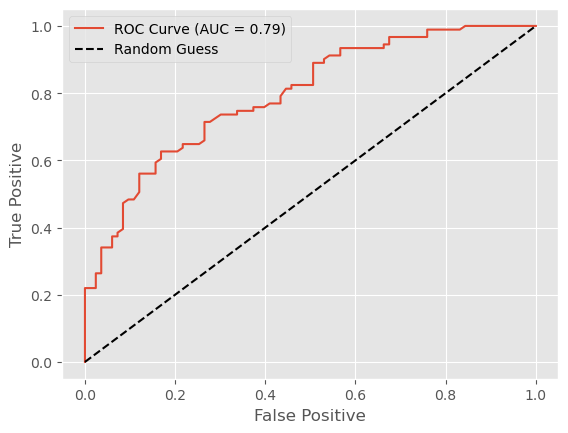

In [9]:
from sklearn.metrics import roc_curve, auc                  # roc & auc curves
import matplotlib.pyplot as plt                             # matplotlib plots

# probabilites
probabilites = model.predict_proba(X_test)[:, 1]

# roc & auc
fpr, tpr, _ = roc_curve(Y_test, probabilites)
roc_auc = auc(fpr, tpr)

# plot
plt.style.use(style = 'ggplot')
plt.plot(fpr, tpr, label = f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--', label = 'Random Guess')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend()
plt.show()

*With this roc curve, we know that an auc of 0.79 means that **79% of the time, our regression model has a good ability to distinguish between the positive and negative classes**, meaning, the model ranks a randomly chosen positive example higher than a randomly chosen negative example.*

*Since we have a 70% accuracy score, let's try and use a random forest tree since that is better for smaller datasets compared to XGBoost. If the random tree poses a better accuracy score, then we will choose this model instead.*

In [10]:
import matplotlib.pyplot as plt                                     # matplotlib for visuals
import pandas as pd                                                 # pandas for data manipulation
from sklearn.ensemble import RandomForestClassifier                 # random forest tree library
from sklearn.metrics import accuracy_score                          # accuracy score
from sklearn.model_selection import GridSearchCV                    # hyperparameter tuning using GridSearch

# inititalizing model
rf = RandomForestClassifier(random_state = 42)

# fitting random forest tree model
rf.fit(X_train, Y_train)

# predicting future values
rf_predict = rf.predict(X_test)

# accuracy score
accuracy = accuracy_score(Y_test, rf_predict)

# results
print('Predicted values:', rf_predict)
print('Random Forest Accuracy:', accuracy)

Predicted values: [1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1
 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1
 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0]
Random Forest Accuracy: 0.6954022988505747


*As we see above, **the accuracy score is higher for the logistic regression model** so we should most likely stick to the model since it is more simple to understand and since having 870 data points, along with 1 predictor, a Random Forest tree isn't really the best use case here.*

#### **3. Model Interpretation & Visualization**

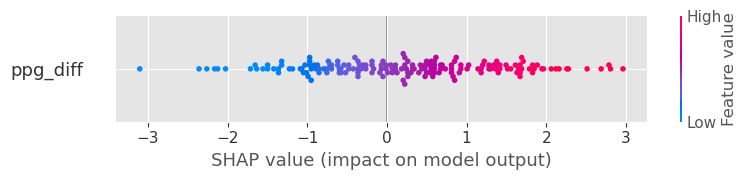

Beta 0 or better known as the intercept is: -0.12.
Beta 1 or the first predictor is: 0.20.


In [11]:
import shap                                                             # using shap for visualizing model

# betas
betas = model.coef_

# intercept 
intercept = model.intercept_

# visualizing model
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

# result
print(f'Beta 0 or better known as the intercept is: {(intercept[0]):.2f}.')
print(f'Beta 1 or the first predictor is: {(betas[0,0]):.2f}.')

*Now, knowing this information, we know usually, $\beta_0$ usually has no inherent intepretation most of the time, but, our predictors do. Since, we are using a logistic regression model, if we want to convert the first predictor, which is PPG, all we have to do is take that value, and unwind it using the $e^{\beta_1}$ formula. Turning out to be $e^{0.20}$ which is approximately $1.22$.*

*So, for **each-one unit increase in PPG,** the **odds** of Team A winning the next game increase by 22%.*

#### **4. Deploying Model With FastAPI**

In [17]:
import os
import joblib
from sklearn.ensemble import RandomForestClassifier

os.makedirs('saved_model', exist_ok = True)

model = LogisticRegression()
model.fit(X_train, Y_train)

joblib.dump(model, 'saved_model/game_model.pkl')

['saved_model/game_model.pkl']